# One vs rest

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


In [234]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [235]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (x_train.T @ (sigma-y_train))
    return theta

In [236]:
def costo(theta, x_train, y_train):
    
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [237]:
def gradiente(theta, x_train, y_train, eta = 0.8, n_iter = 10000):
    J = np.zeros(n_iter)
    m = len(x_train)
    for i in range(n_iter):
        J[i] = -(1/m)*costo(theta, x_train, y_train)
        theta = theta - eta * (1/m)*optimizar(theta, x_train, y_train)
    return theta, J

In [238]:
def  vector_comparacion(y_proba_1, y_proba_2, y_proba_1_value, y_proba_2_value):
    comparar = np.concatenate((y_proba_1, y_proba_2), axis =0).T
    prediction_final = []
    for i in range(len(comparar)):
        #print(compar[i])
        valor_max = comparar[i].max()
        #print(compar[i].max())
        if comparar[i][0] == valor_max:
            prediction_final.append(y_proba_1_value)
        elif comparar[i][1] == valor_max:
            prediction_final.append(y_proba_2_value)

    prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))
    last_data = np.concatenate((y_proba_1, y_proba_2, prediction_final), axis =0).T
    return last_data, prediction_final.T


In [239]:
def exclude_data(class_vector, num_exclude):
    vectores = []

    for i in range(len(class_vector)):
        if class_vector[i] != num_exclude:
            vectores.append(i)

    return np.array(vectores)  

In [240]:
iris = datasets.load_iris()

In [241]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)


In [242]:
for i in range(x.shape[1]):
    mean = x[:,i].mean()
    deviation =  x[:,i].std()
    x[:,i] = (x[:,i] - mean) / deviation

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [244]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Se aplica la sigueinte Formula $$\frac{n * (n -1)}{2} $$

Debido a que tenemos 3 clases, la formula nos devuelve el valor de 6, con este valor debemos de hacer 6 combinaciones de pares de datos. Estas combinaciones serian:

AB
AC
BC 

Donde:

A = setosa
B = versicolor
C = virginica

# AB

## Setosa vs versicolor

In [245]:
x_train[:10], x_test[:10]

(array([[-1.02184904e+00,  1.01900435e+00, -1.39706395e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.28338910e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.05603939e+00,
         -1.05217993e+00],
        [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
          8.77547895e-04],
        [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
          3.95774101e-01],
        [ 1.64384411e+00,  3.28414053e-01,  1.27429511e+00,
          7.90670654e-01],
        [-1.02184904e+00,  5.58610819e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-9.00681170e-01,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
         -1.44707648e+00],
        [ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
          7.90670654e-01]]),
 array([[ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
        [ 1.40150837,  0.32841405,  0.53540856,  0.26414192],
    

In [246]:
y_train[:10], y_test[:10]

(array([[0],
        [0],
        [0],
        [1],
        [1],
        [2],
        [0],
        [0],
        [0],
        [2]]),
 array([[2],
        [1],
        [1],
        [2],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0]]))

In [247]:
num_index_x_train_AB = exclude_data(y_train, 2)
num_index_x_train_AB

array([  0,   1,   2,   3,   4,   6,   7,   8,  11,  12,  13,  15,  16,
        17,  18,  21,  23,  24,  26,  27,  28,  30,  32,  34,  35,  36,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  64,  65,  67,
        68,  69,  71,  72,  75,  78,  80,  81,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  99, 101, 102, 103, 106, 107, 108, 110, 111])

In [248]:
x_train_AB = x_train[num_index_x_train_AB]
y_train_AB = y_train[num_index_x_train_AB]
x_train_AB[:10],  y_train_AB[:10]

(array([[-1.02184904e+00,  1.01900435e+00, -1.39706395e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.28338910e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.05603939e+00,
         -1.05217993e+00],
        [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
          8.77547895e-04],
        [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
          3.95774101e-01],
        [-1.02184904e+00,  5.58610819e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-9.00681170e-01,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
         -1.44707648e+00],
        [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
         -1.31544430e+00],
        [-2.94841818e-01, -1.28296331e+00,  8.07091462e-02,
         -1.30754636e-01]]),
 array([[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]

In [249]:
x_train_AB = np.c_[np.ones((len(x_train_AB),1)), x_train_AB]
x_test_AB = np.c_[np.ones((len(x_test),1)), x_test]

In [250]:
x_train_AB.shape

(78, 5)

In [251]:
n_iter = 10000

theta_setosa_AB = np.random.randn(x_train_AB.shape[1]).reshape(x_train_AB.shape[1],1)
y_train_set_AB = (y_train_AB == 0).astype(int)

theta_setosa_AB, J_set = gradiente(theta_setosa_AB, x_train_AB, y_train_set_AB)
theta_setosa_AB

array([[-5.33505689],
       [-1.62531878],
       [ 3.99584615],
       [-4.09054924],
       [-4.58115812]])

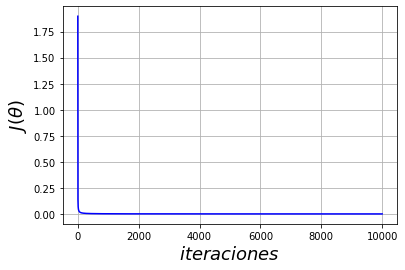

In [252]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [253]:
y_proba_set_AB =np.round(sigmoid(theta_setosa_AB.T @ x_test_AB.T),2)
y_proba_set_AB

array([[0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.81, 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  ]])

In [254]:
eta = 0.8
n_iter = 10000
theta_versicolor_AB = np.random.randn(x_train_AB.shape[1]).reshape(x_train_AB.shape[1],1)
y_train_ver_AB = (y_train_AB == 1).astype(int)

theta_versicolor_AB, J_vers = gradiente(theta_versicolor_AB, x_train_AB, y_train_ver_AB)
theta_versicolor_AB

array([[ 5.2468056 ],
       [ 1.40336888],
       [-4.00838678],
       [ 4.56377532],
       [ 4.28674173]])

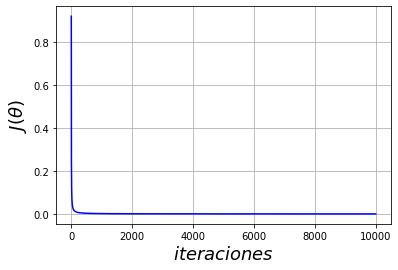

In [255]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [256]:
y_proba_ver_AB =np.round(sigmoid(theta_versicolor_AB.T @ x_test_AB.T),2)
y_proba_ver_AB

array([[1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.18, 1.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 1.  , 1.  ]])

In [257]:
last_data_AB, votar_AB = vector_comparacion(y_proba_set_AB,y_proba_ver_AB, 0 ,1)
last_data_AB

array([[0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.81, 0.18, 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
 

In [258]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# AC

## setosa vs  virginica

In [259]:
x_train[:10], x_test[:10]

(array([[-1.02184904e+00,  1.01900435e+00, -1.39706395e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.28338910e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.05603939e+00,
         -1.05217993e+00],
        [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
          8.77547895e-04],
        [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
          3.95774101e-01],
        [ 1.64384411e+00,  3.28414053e-01,  1.27429511e+00,
          7.90670654e-01],
        [-1.02184904e+00,  5.58610819e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-9.00681170e-01,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
         -1.44707648e+00],
        [ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
          7.90670654e-01]]),
 array([[ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
        [ 1.40150837,  0.32841405,  0.53540856,  0.26414192],
    

In [260]:
num_index_x_train_AC = exclude_data(y_train, 1)
num_index_x_train_AC

array([  0,   1,   2,   5,   6,   7,   8,   9,  10,  11,  14,  15,  16,
        18,  19,  20,  22,  23,  24,  25,  28,  29,  31,  33,  37,  39,
        40,  42,  44,  47,  48,  49,  50,  56,  57,  59,  60,  62,  63,
        65,  66,  68,  69,  70,  71,  72,  73,  74,  76,  77,  79,  81,
        82,  83,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 103, 104, 105, 106, 107, 109])

In [261]:
x_train_AC = x_train[num_index_x_train_AC]
y_train_AC = y_train[num_index_x_train_AC]
x_train_AC[:10],  y_train_AC[:10]

(array([[-1.02184904,  1.01900435, -1.39706395, -1.18381211],
        [-0.90068117,  1.70959465, -1.2833891 , -1.18381211],
        [-0.90068117,  1.70959465, -1.05603939, -1.05217993],
        [ 1.64384411,  0.32841405,  1.27429511,  0.79067065],
        [-1.02184904,  0.55861082, -1.34022653, -1.3154443 ],
        [-0.90068117,  0.78880759, -1.2833891 , -1.3154443 ],
        [-0.7795133 ,  2.40018495, -1.2833891 , -1.44707648],
        [ 0.67450115,  0.09821729,  0.99010798,  0.79067065],
        [ 0.67450115, -0.82256978,  0.87643312,  0.92230284],
        [-1.14301691,  0.09821729, -1.2833891 , -1.3154443 ]]),
 array([[0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [2],
        [2],
        [0]]))

In [262]:
x_train_AC = np.c_[np.ones((len(x_train_AC),1)), x_train_AC]
x_test_AC = np.c_[np.ones((len(x_test),1)), x_test]

In [263]:
x_train_AC.shape

(72, 5)

In [264]:
n_iter = 10000

theta_setosa_AC = np.random.randn(x_train_AC.shape[1]).reshape(x_train_AC.shape[1],1)
y_train_set_AC = (y_train_AC == 0).astype(int)

theta_setosa_AC, J_set = gradiente(theta_setosa_AC, x_train_AC, y_train_set_AC)
theta_setosa_AC

array([[-1.45243714],
       [-0.80095338],
       [ 1.97237842],
       [-4.10190899],
       [-3.71842903]])

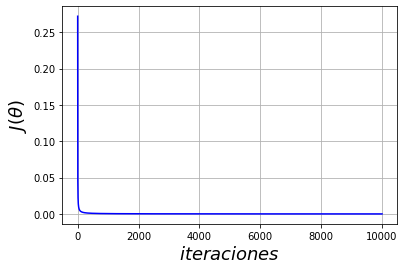

In [265]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [266]:
y_proba_set_AC =np.round(sigmoid(theta_setosa_AC.T @ x_test_AC.T),2)
y_proba_set_AC

array([[0.  , 0.01, 0.01, 0.  , 1.  , 0.  , 0.  , 1.  , 0.05, 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.01, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.05, 0.  ]])

In [267]:
eta = 0.8
n_iter = 10000
theta_virginica_AC = np.random.randn(x_train_AC.shape[1]).reshape(x_train_AC.shape[1],1)
y_train_ver_AC = (y_train_AC == 2).astype(int)

theta_virginica_AC, J_vir = gradiente(theta_virginica_AC, x_train_AC, y_train_ver_AC)
theta_virginica_AC

array([[ 1.69172362],
       [ 1.39606867],
       [-2.14927157],
       [ 3.91677607],
       [ 3.38823422]])

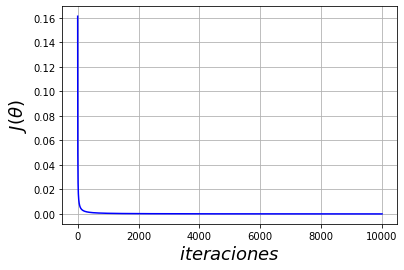

In [268]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [269]:
y_proba_vir_AC =np.round(sigmoid(theta_virginica_AC.T @ x_test_AC.T),2)
y_proba_vir_AC

array([[1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.97, 0.  , 1.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 0.96, 1.  ]])

In [270]:
last_data_AC, votar_AC = vector_comparacion(y_proba_set_AC,y_proba_vir_AC, 0 ,2)
last_data_AC

array([[0.  , 1.  , 2.  ],
       [0.01, 1.  , 2.  ],
       [0.01, 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.05, 0.97, 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.05, 0.96, 2.  ],
 

In [271]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# BC

## versicolor vs  virginica

In [272]:
x_train[:10], x_test[:10]

(array([[-1.02184904e+00,  1.01900435e+00, -1.39706395e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.28338910e+00,
         -1.18381211e+00],
        [-9.00681170e-01,  1.70959465e+00, -1.05603939e+00,
         -1.05217993e+00],
        [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
          8.77547895e-04],
        [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
          3.95774101e-01],
        [ 1.64384411e+00,  3.28414053e-01,  1.27429511e+00,
          7.90670654e-01],
        [-1.02184904e+00,  5.58610819e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-9.00681170e-01,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
         -1.44707648e+00],
        [ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
          7.90670654e-01]]),
 array([[ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
        [ 1.40150837,  0.32841405,  0.53540856,  0.26414192],
    

In [273]:
num_index_x_train_BC = exclude_data(y_train, 0)
num_index_x_train_BC

array([  3,   4,   5,   9,  10,  12,  13,  14,  17,  19,  20,  21,  22,
        25,  26,  27,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        41,  43,  45,  46,  49,  50,  51,  52,  53,  54,  55,  58,  61,
        63,  64,  66,  67,  70,  73,  74,  75,  76,  77,  78,  79,  80,
        82,  83,  84,  85,  86,  87,  88,  89,  93,  94,  95,  96,  97,
        98, 100, 102, 104, 105, 108, 109, 110, 111])

In [274]:
x_train_BC = x_train[num_index_x_train_BC]
y_train_BC = y_train[num_index_x_train_BC]
x_train_BC[:10],  y_train_BC[:10]

(array([[-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
          8.77547895e-04],
        [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
          3.95774101e-01],
        [ 1.64384411e+00,  3.28414053e-01,  1.27429511e+00,
          7.90670654e-01],
        [ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
          7.90670654e-01],
        [ 6.74501145e-01, -8.22569778e-01,  8.76433123e-01,
          9.22302838e-01],
        [-2.94841818e-01, -1.28296331e+00,  8.07091462e-02,
         -1.30754636e-01],
        [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
          5.27406285e-01],
        [ 3.10997534e-01, -1.05276654e+00,  1.04694540e+00,
          2.64141916e-01],
        [-1.73673948e-01, -5.92373012e-01,  4.21733708e-01,
          1.32509732e-01],
        [ 2.24968346e+00, -1.05276654e+00,  1.78583195e+00,
          1.44883158e+00]]),
 array([[1],
        [1],
        [2],
        [2],
        [2],
        [1],
        [1],
        [2],
        [1],
        [2]

In [275]:
x_train_BC = np.c_[np.ones((len(x_train_BC),1)), x_train_BC]
x_test_BC = np.c_[np.ones((len(x_test),1)), x_test]

In [276]:
x_train_BC.shape

(74, 5)

In [277]:
n_iter = 10000

theta_versicolor_BC = np.random.randn(x_train_BC.shape[1]).reshape(x_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 1).astype(int)

theta_versicolor_BC, J_set = gradiente(theta_versicolor_BC, x_train_BC, y_train_set_BC)
theta_versicolor_BC

array([[ 15.52998772],
       [  1.51887502],
       [  2.68676375],
       [-13.52774427],
       [ -9.43023445]])

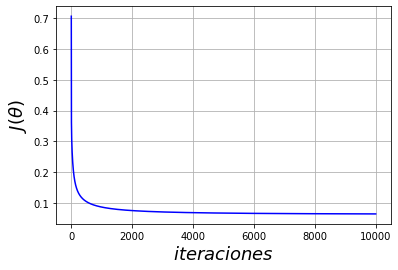

In [278]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [279]:
y_proba_ver_BC =np.round(sigmoid(theta_versicolor_BC.T @ x_test_BC.T),2)
y_proba_ver_BC

array([[0.  , 1.  , 1.  , 0.  , 1.  , 0.99, 1.  , 1.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
        0.6 , 1.  , 1.  , 0.  , 0.  , 1.  , 0.01, 1.  , 0.  , 0.  , 0.5 ,
        0.  , 1.  , 0.  , 1.  , 0.36]])

In [280]:
n_iter = 10000

theta_virginica_BC = np.random.randn(x_train_BC.shape[1]).reshape(x_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 2).astype(int)

theta_virginica_BC, J_set = gradiente(theta_virginica_BC, x_train_BC, y_train_set_BC)
theta_virginica_BC

array([[-15.54162342],
       [ -1.52001193],
       [ -2.68859295],
       [ 13.53910082],
       [  9.43553342]])

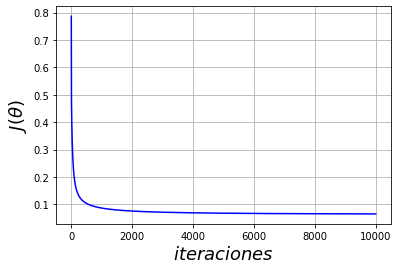

In [281]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [282]:
y_proba_vir_BC =np.round(sigmoid(theta_virginica_BC.T @ x_test_BC.T),2)
y_proba_vir_BC

array([[1.  , 0.  , 0.  , 1.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ,
        0.4 , 0.  , 0.  , 1.  , 1.  , 0.  , 0.99, 0.  , 1.  , 1.  , 0.5 ,
        1.  , 0.  , 1.  , 0.  , 0.64]])

In [283]:
last_data_BC, votar_BC = vector_comparacion(y_proba_ver_BC,y_proba_vir_BC, 1 ,2)
last_data_BC

array([[0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.99, 0.01, 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.6 , 0.4 , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.01, 0.99, 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.5 , 0.5 , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
 

In [284]:
votar_AB.T, votar_AC.T, votar_BC.T, y_test.T

(array([[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
         1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]]),
 array([[2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0,
         2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2]]),
 array([[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
         1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2]]),
 array([[2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0,
         1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2]]))

In [285]:
vote_data = np.concatenate((votar_AB, votar_AC, votar_BC), axis =1)
vote_data

array([[1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2]])

In [286]:
data = []

for i in range(len(vote_data)):   
    values, votes = np.unique(vote_data[i], return_counts=True)
    index_winner = votes.argmax()
    data.append(values[index_winner])
data = np.array(data)
np.concatenate((data.reshape(len(data), 1), y_test), axis =1)

array([[2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2]])

In [287]:
cm = confusion_matrix(y_test , data)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 15]], dtype=int64)

In [288]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total


0.9736842105263158

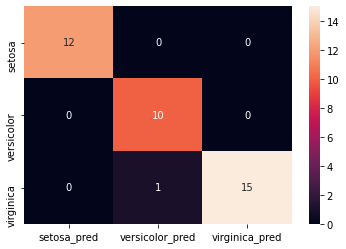

In [289]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
cm = confusion_matrix(y_test , data)
f = sns.heatmap(cm, annot=True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [290]:
print(classification_report(y_test, data, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

